In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import timetrack as tt
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.gridspec as gridspec
matplotlib.rcParams['backend'] = 'module://ipykernel.pylab.backend_inline'

files = sorted(glob("./Em*/chain_RU*.npy"))

dabc = [0.1,0.05,0.2,0.5,0.029]

DABC = []

discard = []

LI = []
DIR = []

for f in files:
    data = np.load(f)
    links = data[:,:13]
    theta = data[:,13:39]
    S = data[:,39]
    P = data[:,40]
    mask = np.logical_and(P > 10, S > 1)
    links = links[mask,:]
    theta = theta[mask,:]
    S = S[mask]
    P = P[mask]
    d = 1-S**2/(S**2+1**2)*P**2/(P**2+10**2)
    sort = np.argsort(d)
    links = links[sort,:]
    theta = theta[sort,:]
    S = S[sort]
    P = P[sort]
    u, iu = np.unique(links,axis=0,return_index=True)
    uni =  np.shape(u)[0]
    S = S[iu]
    P = P[iu]
    if float(f[4+11:4+13]) < 20 and uni >0:
        DABC.extend([uni*[dabc[0]]])
    elif float(f[4+11:4+13]) < 40 and uni >0:
        DABC.extend([uni*[dabc[1]]])
    elif float(f[4+11:4+13]) < 60 and uni >0:
        DABC.extend([uni*[dabc[2]]])
    elif float(f[4+11:4+13]) < 80 and uni >0:
        DABC.extend([uni*[dabc[3]]])
    elif float(f[4+11:4+13]) < 100 and uni >0:
        DABC.extend([uni*[dabc[4]]])
        
    boi = []   
    
    for i in iu:
        param = theta[i,:]
        bo = tt.plot_tracks(param, discard = discard,direc=f[:6])
        boi.extend([bo])
        
    if len(u) > 0:
        print(f,u)
        if LI == []:
            LI = u[boi,:].copy()
            PP = P[boi].copy()
            SS = S[boi].copy()
        else:
            LI = np.vstack((LI,u[boi,:]))
            PP = np.append(PP,P[boi])
            SS = np.append(SS,S[boi])

    DIR.extend(np.shape(u)[0]*[f])

d = 1-SS**2/(SS**2+1**2)*PP**2/(PP**2+10**2)
sort = np.argsort(d)
PP = PP[sort]
SS = SS[sort]

uL, iu = np.unique(LI[sort,:],axis=0,return_index=True)
print(len(iu), len(files))
uP = PP[iu]
uS = SS[iu]

DABC = np.concatenate(DABC)[iu]

np.save("adaptive_systems.npy",uL)

./Em1/chain_RUN19.npy [[ 0.  0.  0. -1.  1.  1.  1.  0. -1.  1. -1.  0. -1.]]
./Em1/chain_RUN37.npy [[-1.  1. -1. -1.  1. -1.  0.  1.  0. -1. -1.  1.  1.]]
./Em2/chain_RUN19.npy [[ 0.  0. -1. -1.  1.  1.  1.  0. -1.  1. -1.  0. -1.]
 [ 0.  0.  0. -1.  1.  1.  1.  0. -1.  1. -1.  0. -1.]]
./Em2/chain_RUN22.npy [[-1. -1.  0.  0.  1.  0.  1. -1.  1.  1.  1.  0. -1.]]
./Em2/chain_RUN23.npy [[ 0.  0. -1. -1.  1. -1.  0. -1.  1.  1.  1.  0. -1.]
 [ 0.  0. -1. -1.  1. -1.  0.  0.  1.  1.  1.  0. -1.]
 [ 0.  0. -1. -1.  1. -1.  0.  1.  1.  1.  1.  0. -1.]]
./Em2/chain_RUN34.npy [[-1.  0.  0.  0.  1.  1.  1.  1. -1.  1. -1.  1. -1.]]
./Em2/chain_RUN37.npy [[-1.  1. -1. -1.  1. -1.  0.  1.  0. -1. -1.  1.  1.]
 [-1.  1. -1. -1.  1. -1.  0.  1.  1. -1. -1.  1.  1.]
 [ 0.  0. -1. -1.  1. -1.  0.  1.  0. -1. -1.  1.  1.]]
./Em2/chain_RUN92.npy [[-1.  0.  0. -1.  1.  1. -1. -1. -1.  1. -1.  1.  0.]]
./Em2/chain_RUN99.npy [[-1.  0. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1.]
 [-1.  0.  0. -1.  1.  1

In [2]:
print(len(DABC[DABC==0.029]))
print(len(DABC[DABC==0.05]))
print(len(DABC[DABC==0.1]))

7
18
6


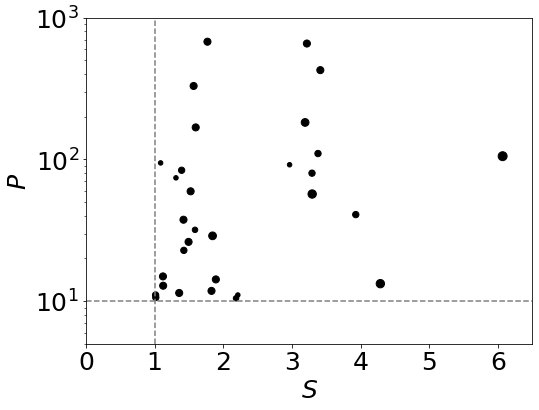

In [9]:
counts = np.count_nonzero(uL==0,axis=1)

plt.figure(figsize=(8,6))
plt.scatter(uS,uP,s=(1+counts)*10,color="k")
plt.yscale("log")
#plt.xscale("log")
plt.xlabel(r"$S$",fontsize=25)
plt.ylabel(r"$P$",fontsize=25)
plt.xlim(0,6.5)
plt.ylim(5,1000)
plt.axhline(y=10,linestyle="--",color="grey")
plt.axvline(x=1,linestyle="--",color="grey")
plt.xticks(size=25)
plt.yticks(size=25)
plt.savefig("scatter.pdf", bbox_inches='tight',facecolor='w')

./Em1/chain_RUN19.npy [ 0.  0.  0. -1.  1.  1.  1.  0. -1.  1. -1.  0. -1.]
2131
./Em1/chain_RUN37.npy [-1.  1. -1. -1.  1. -1.  0.  1.  0. -1. -1.  1.  1.]
17
./Em2/chain_RUN19.npy [ 0.  0. -1. -1.  1.  1.  1.  0. -1.  1. -1.  0. -1.]
13
./Em2/chain_RUN19.npy [ 0.  0.  0. -1.  1.  1.  1.  0. -1.  1. -1.  0. -1.]
2119
./Em2/chain_RUN22.npy [-1. -1.  0.  0.  1.  0.  1. -1.  1.  1.  1.  0. -1.]
561
./Em2/chain_RUN23.npy [ 0.  0. -1. -1.  1. -1.  0. -1.  1.  1.  1.  0. -1.]
145
./Em2/chain_RUN23.npy [ 0.  0. -1. -1.  1. -1.  0.  0.  1.  1.  1.  0. -1.]
1317
./Em2/chain_RUN23.npy [ 0.  0. -1. -1.  1. -1.  0.  1.  1.  1.  1.  0. -1.]
7
./Em2/chain_RUN34.npy [-1.  0.  0.  0.  1.  1.  1.  1. -1.  1. -1.  1. -1.]
283
./Em2/chain_RUN37.npy [-1.  1. -1. -1.  1. -1.  0.  1.  0. -1. -1.  1.  1.]
57
./Em2/chain_RUN37.npy [-1.  1. -1. -1.  1. -1.  0.  1.  1. -1. -1.  1.  1.]
2
./Em2/chain_RUN37.npy [ 0.  0. -1. -1.  1. -1.  0.  1.  0. -1. -1.  1.  1.]
7
./Em2/chain_RUN92.npy [-1.  0.  0. -1.  1.  1.

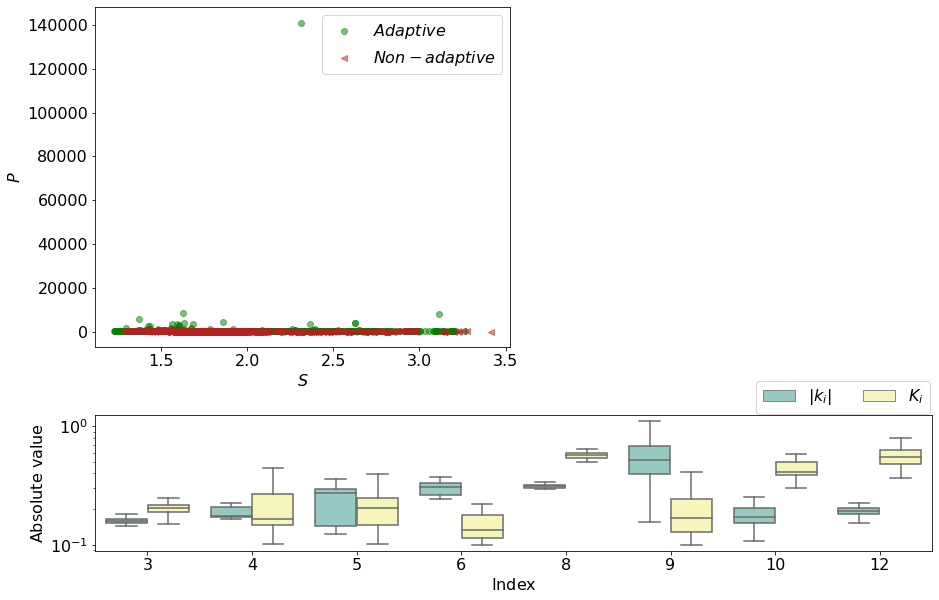

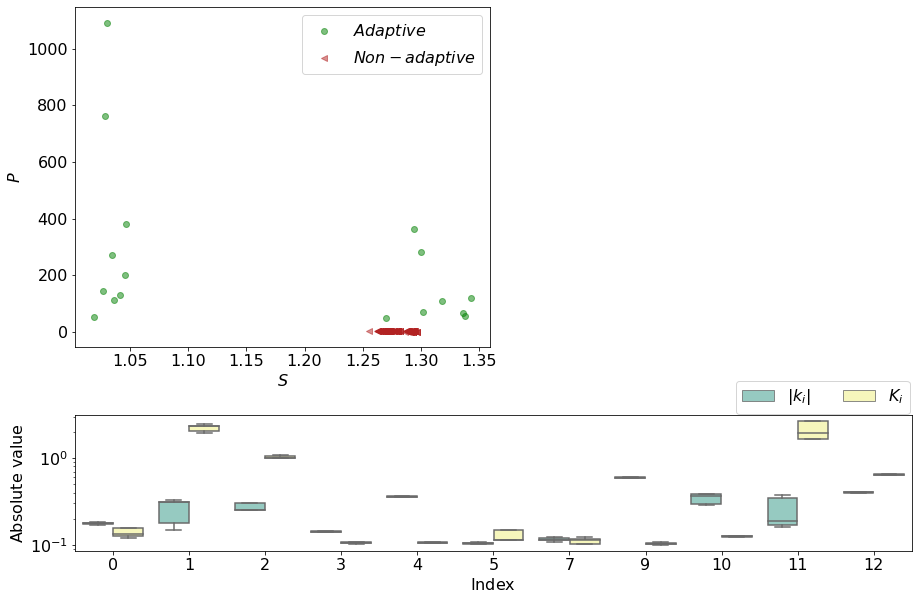

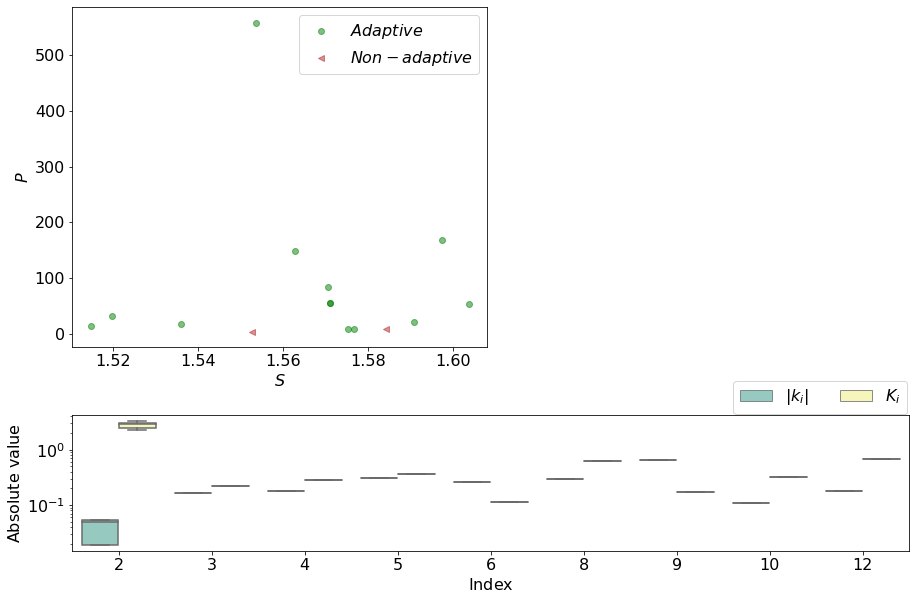

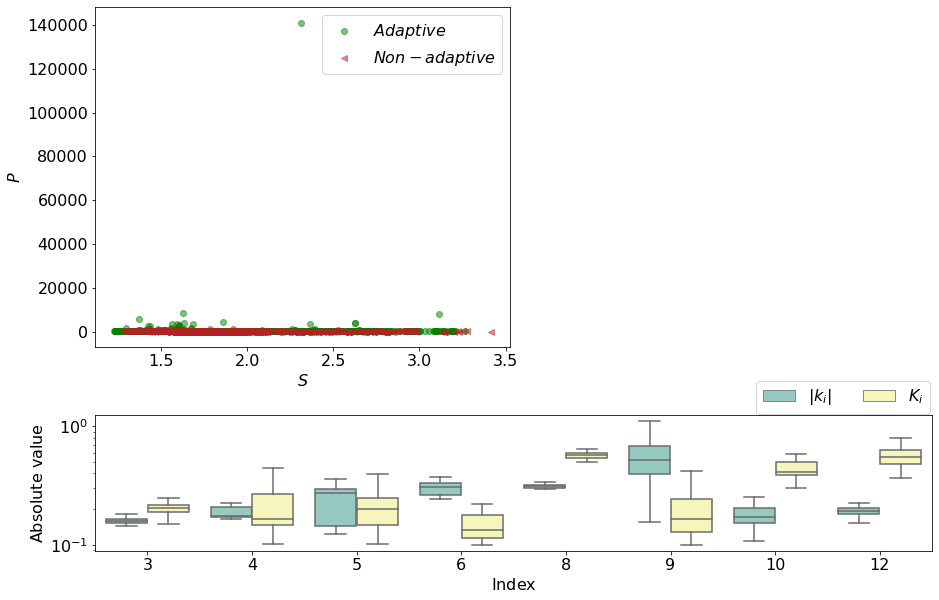

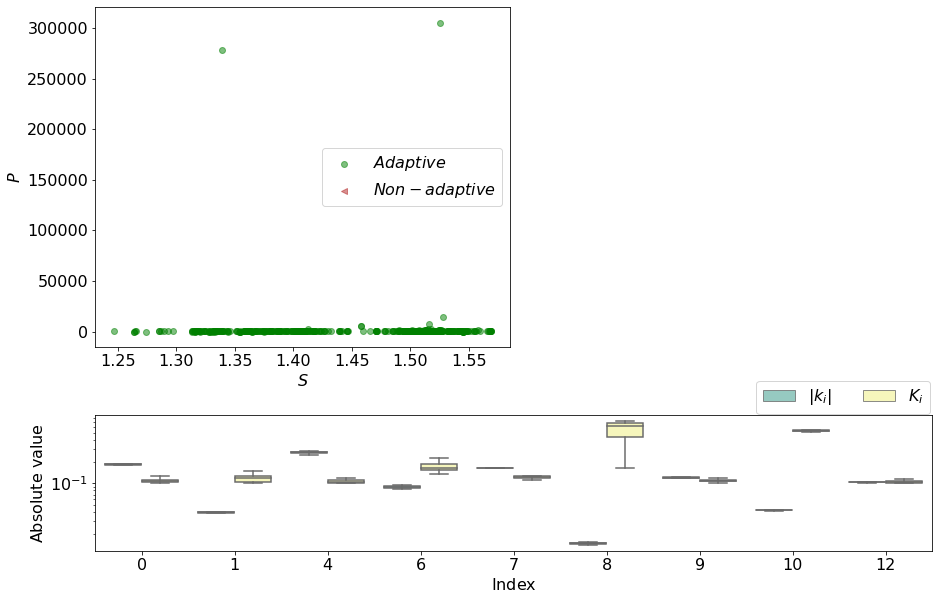

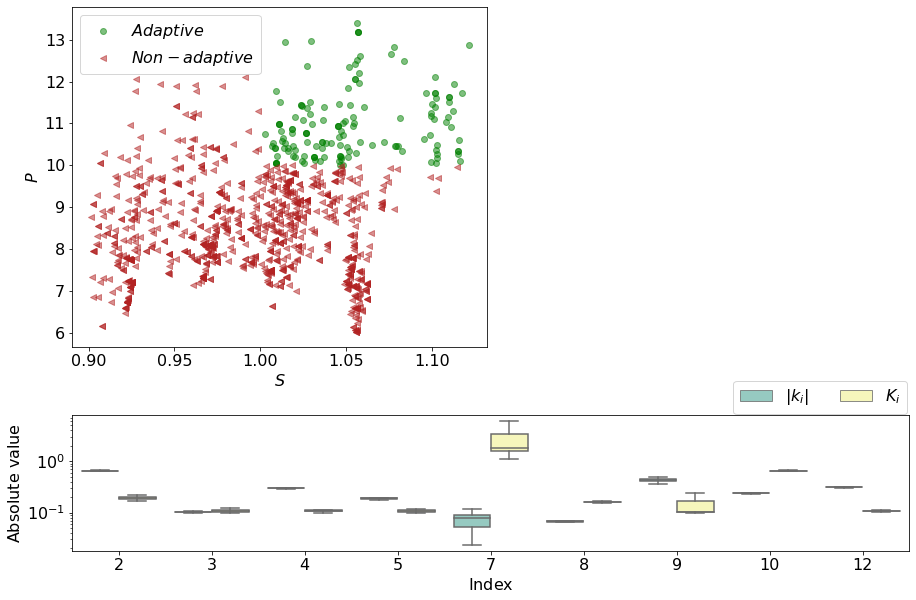

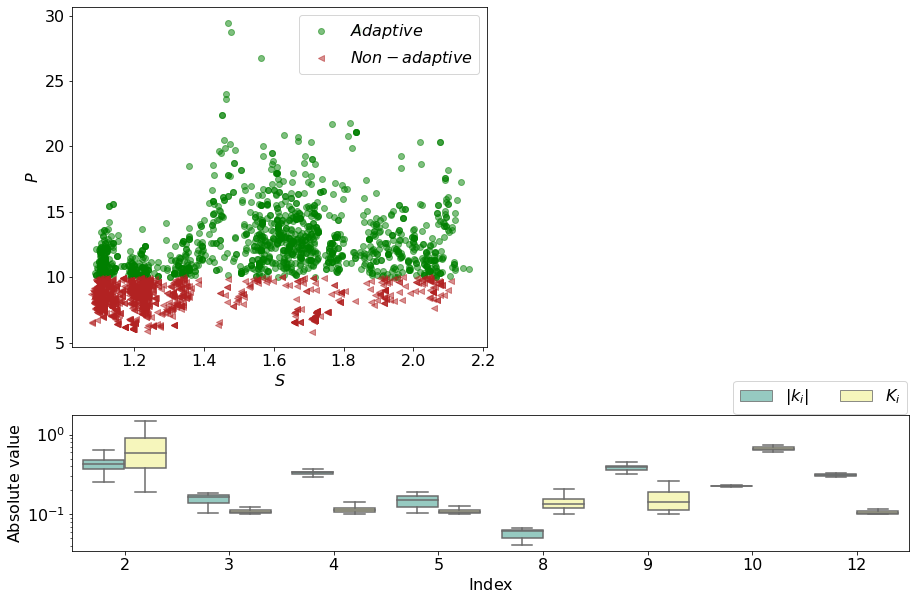

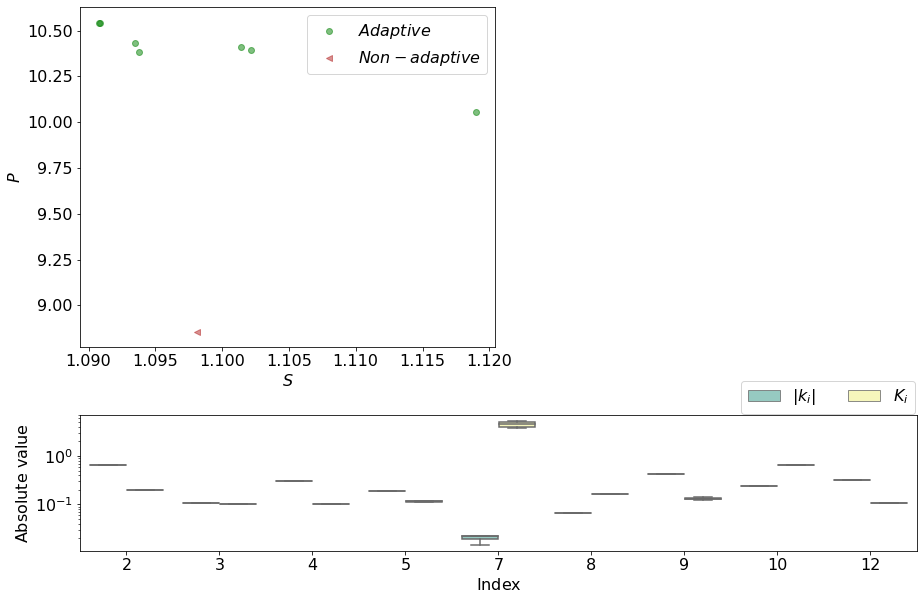

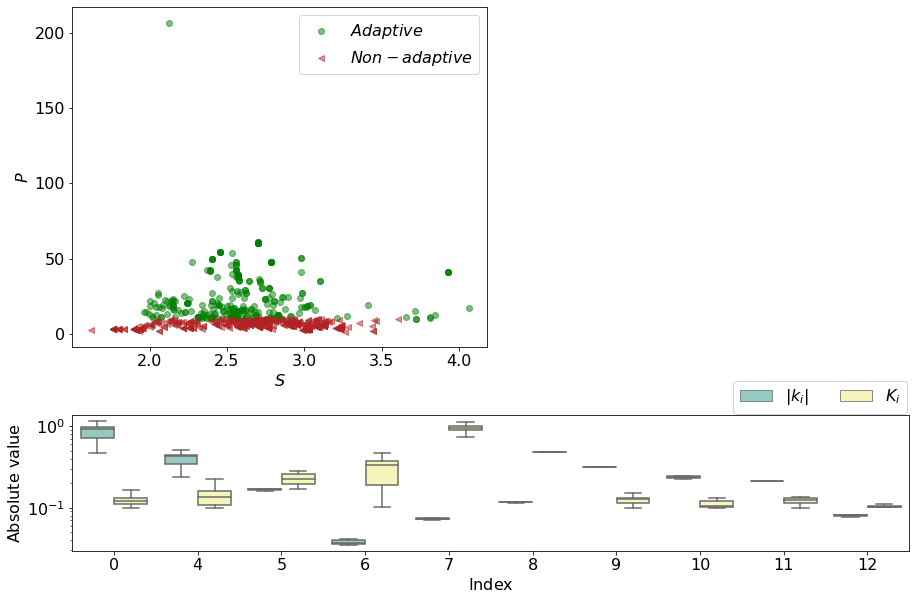

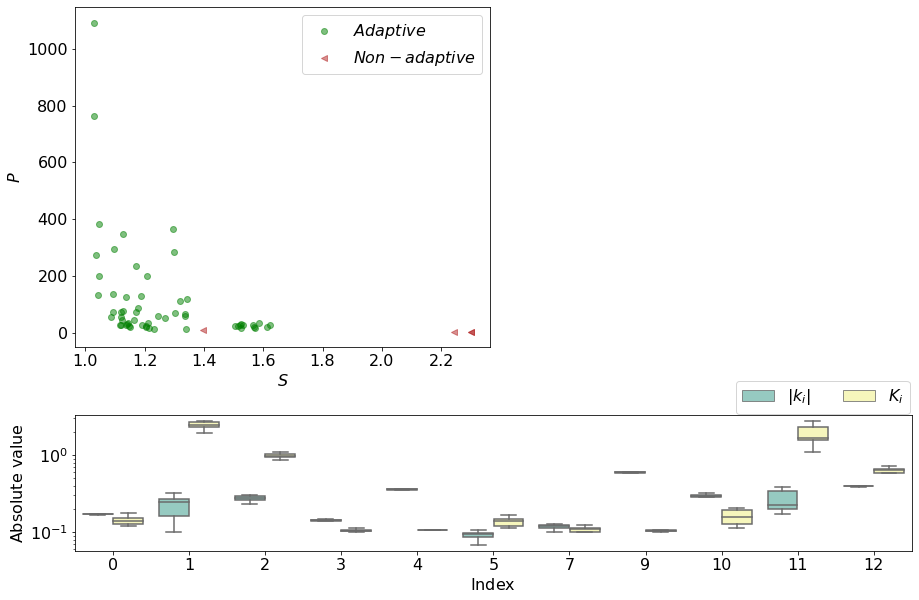

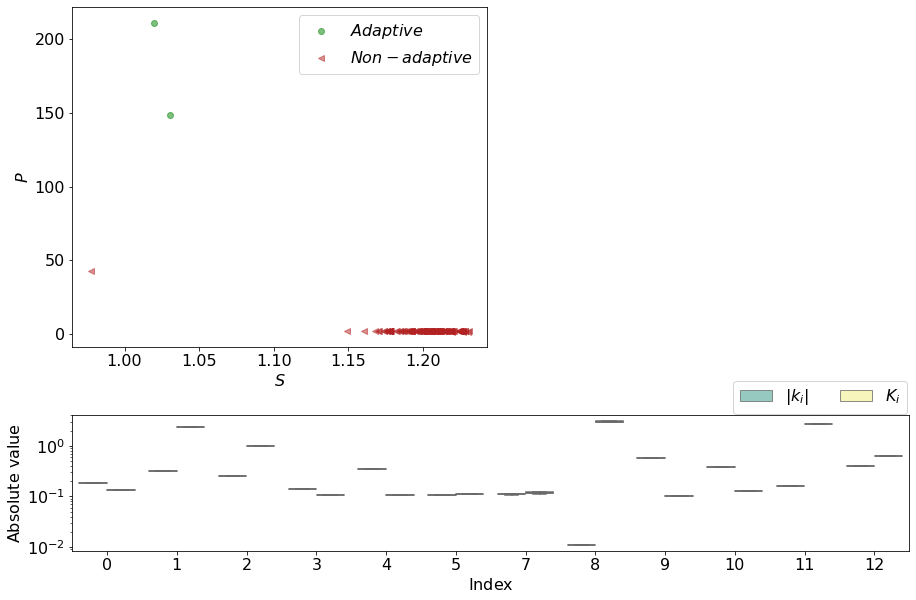

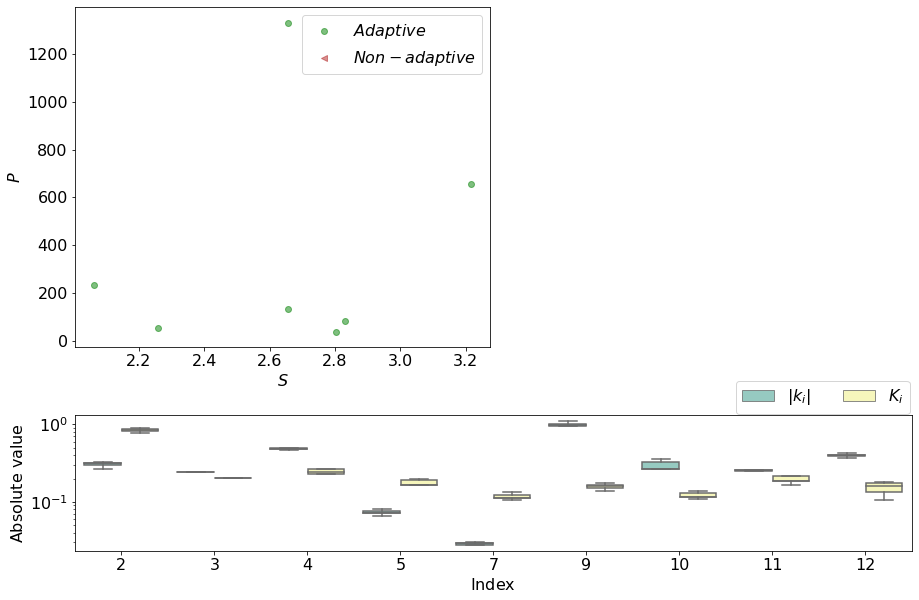

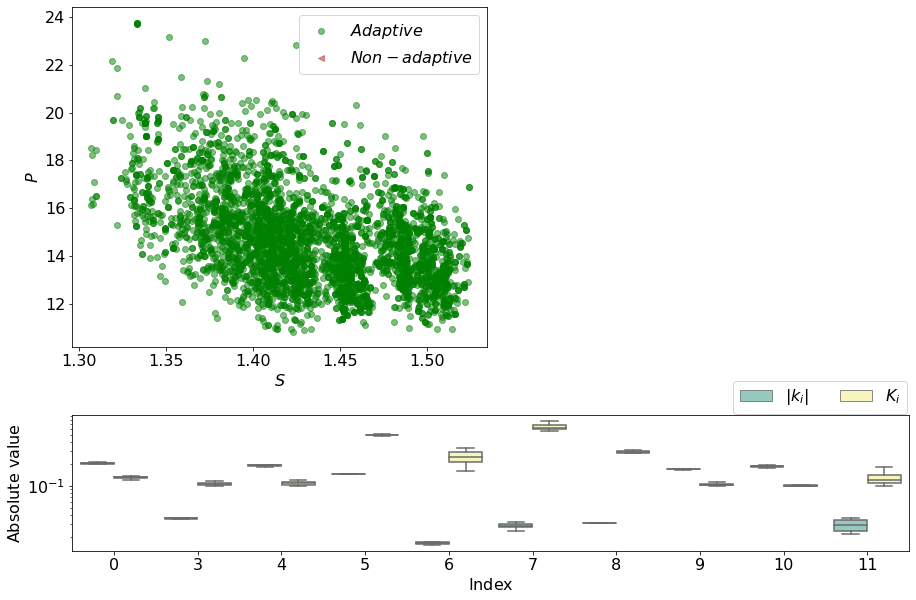

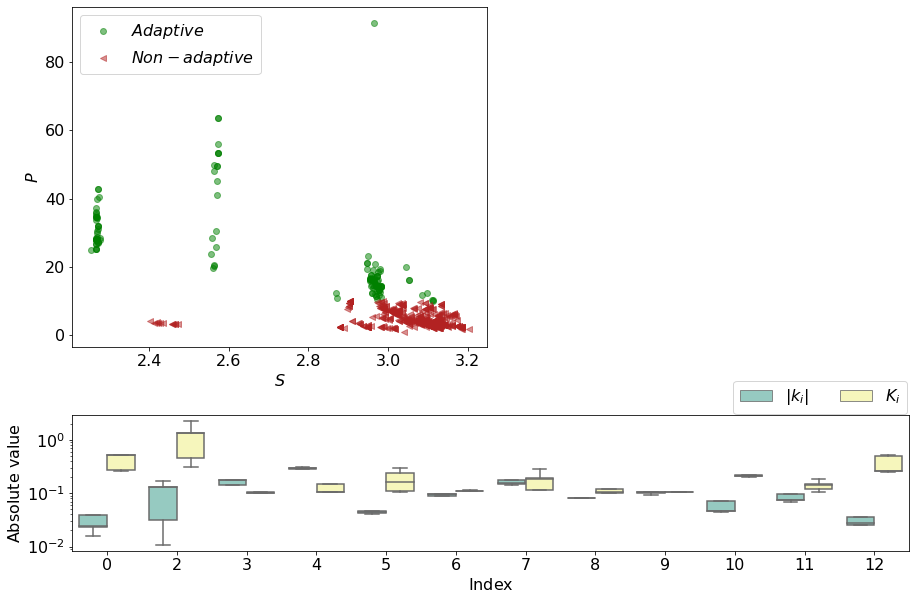

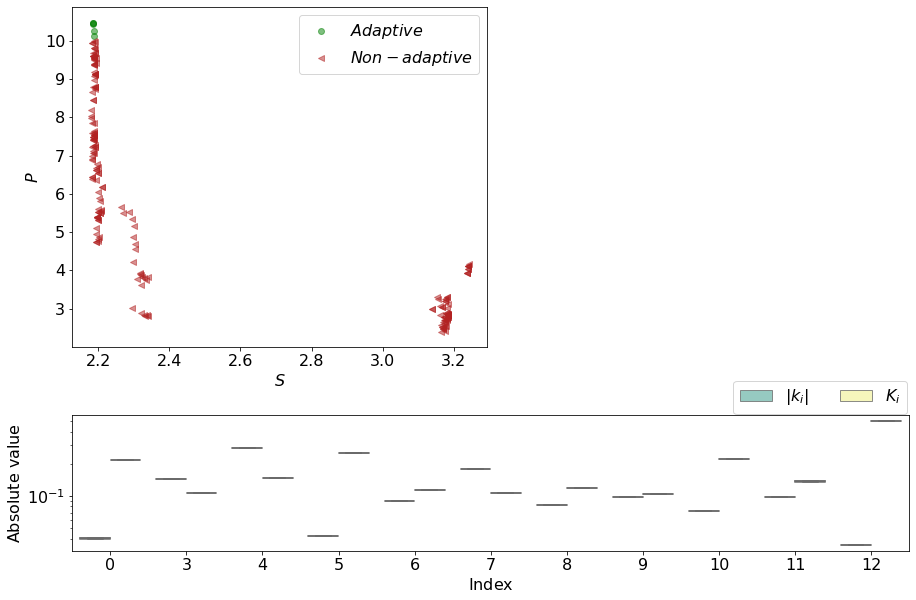

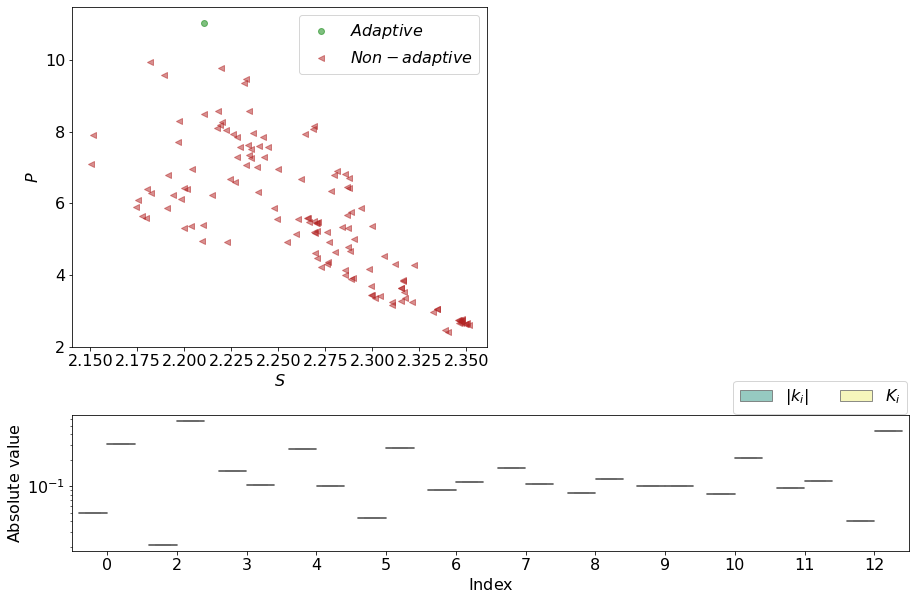

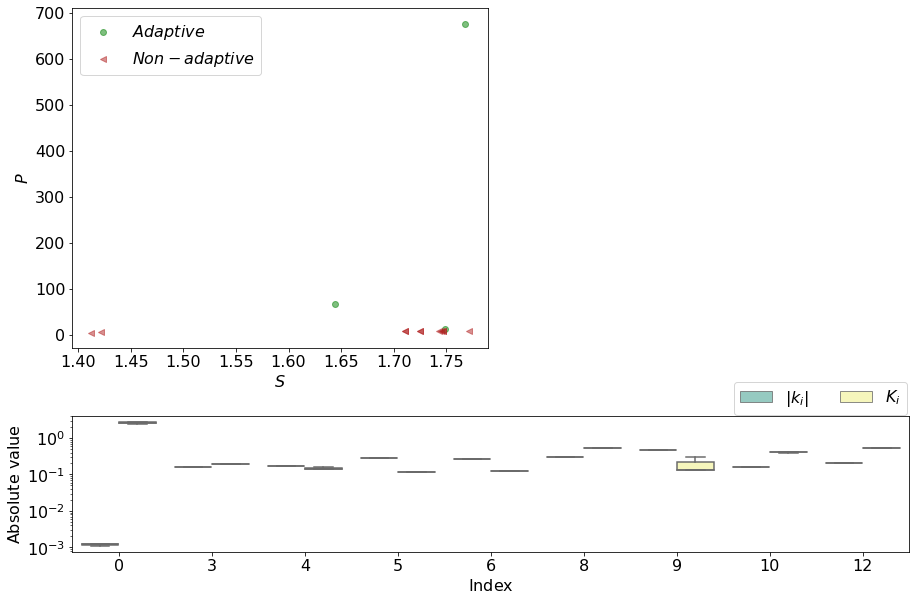

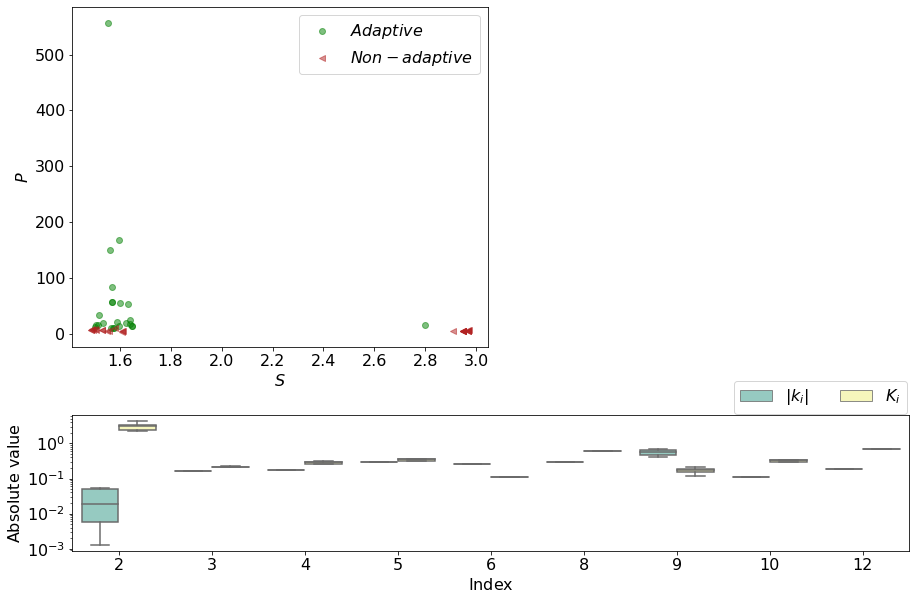

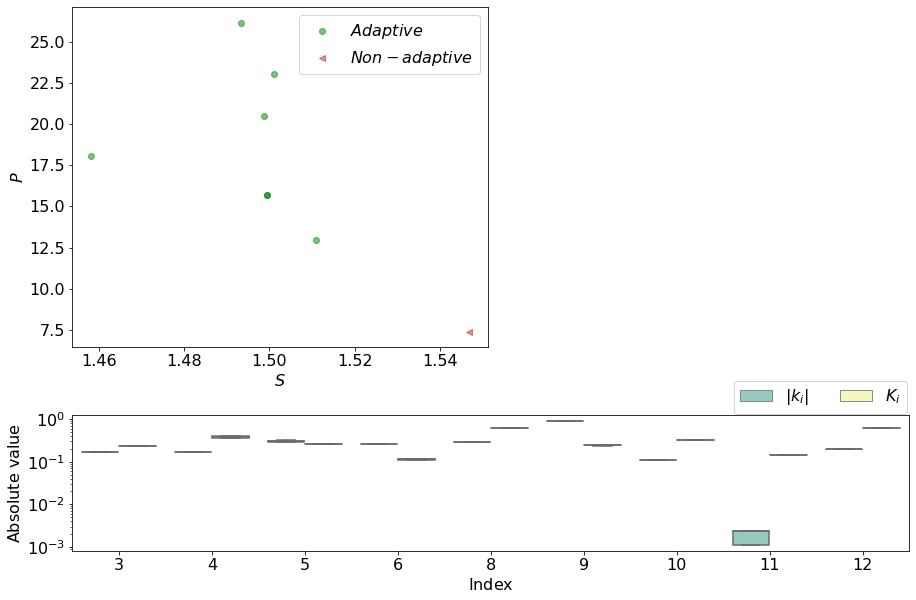

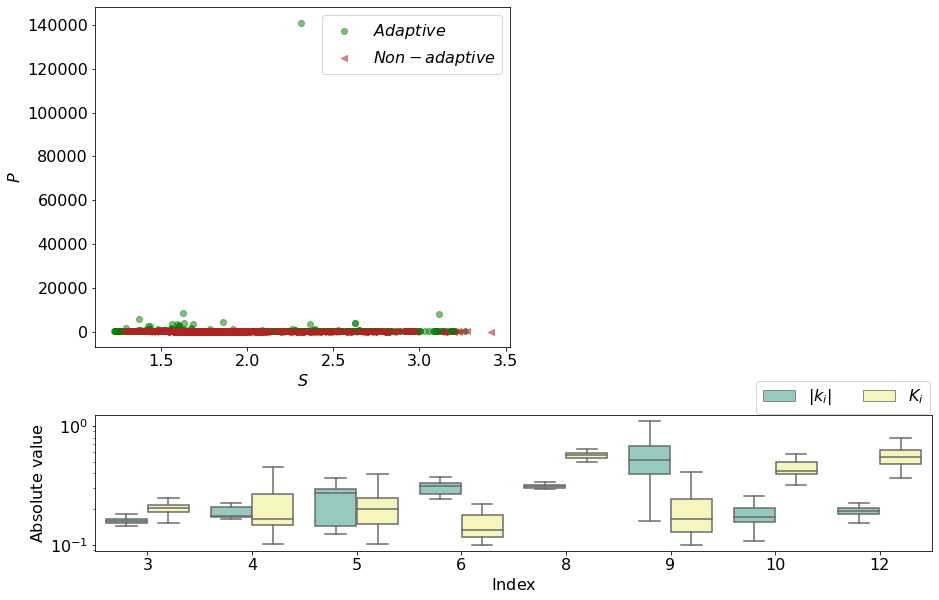

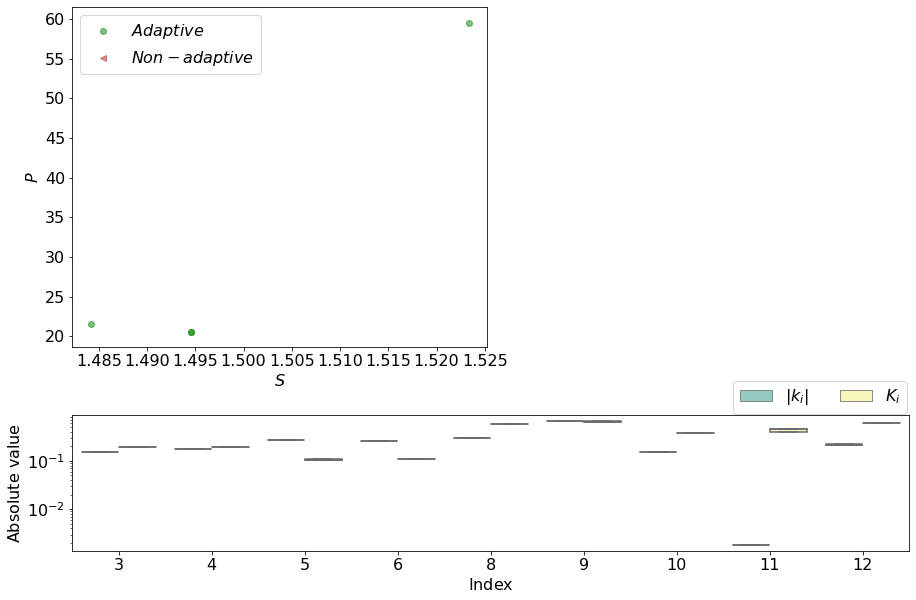

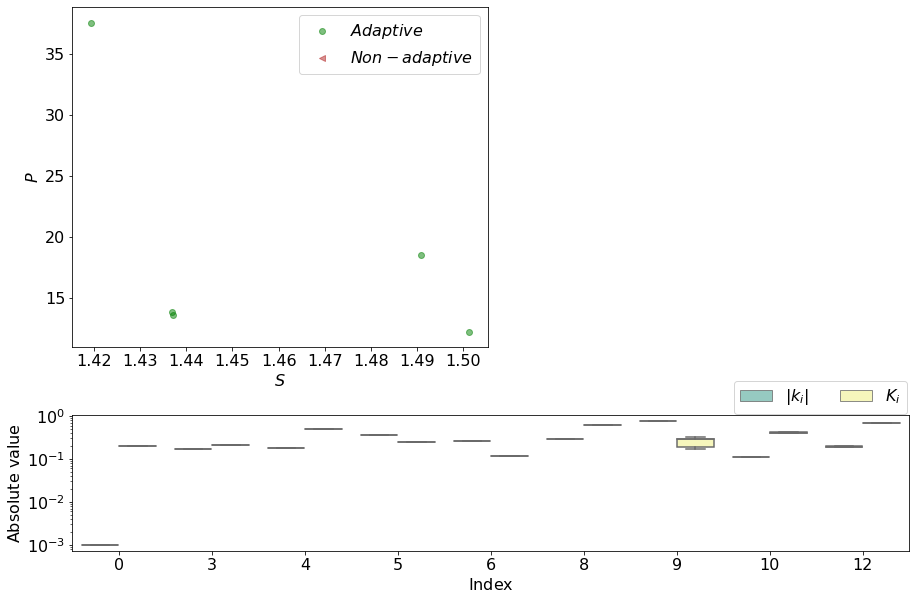

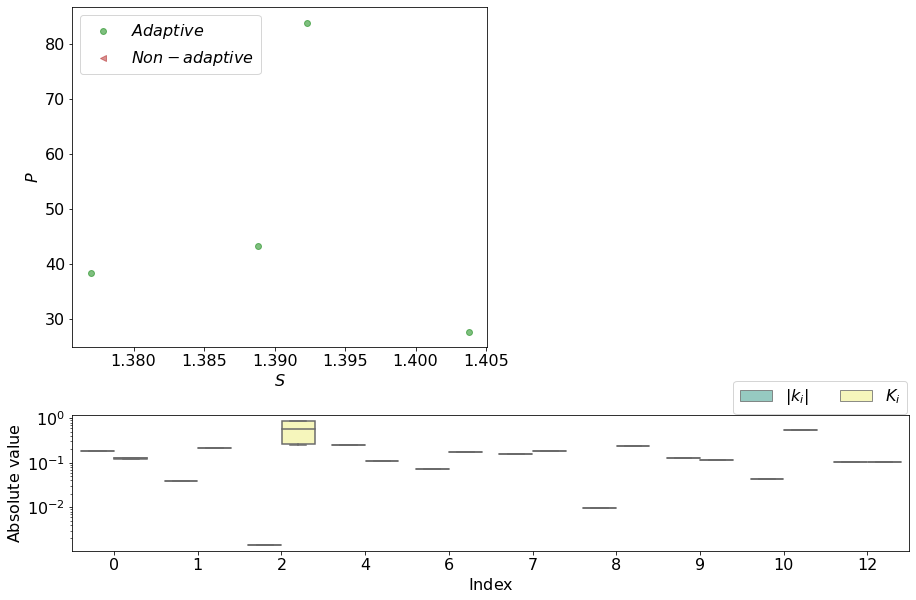

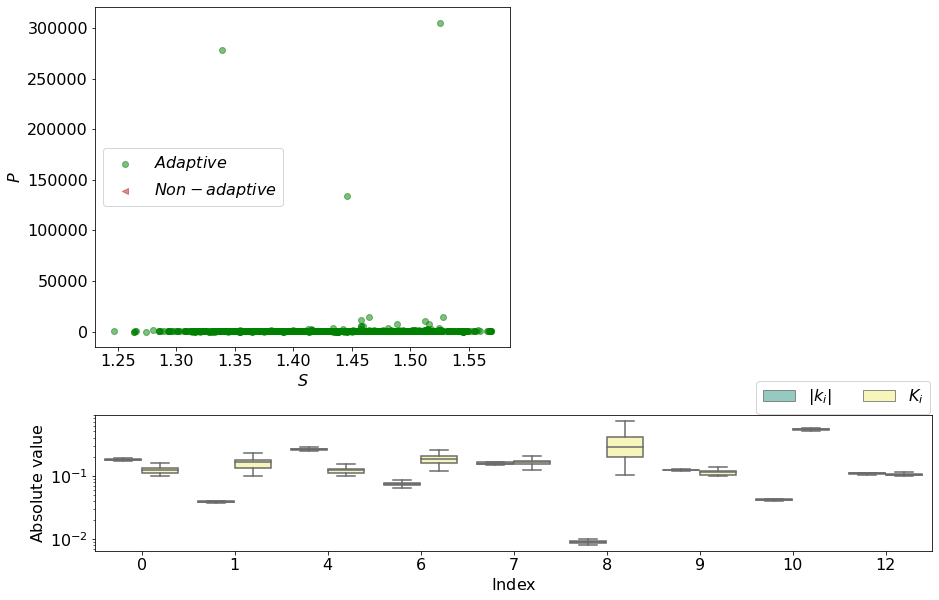

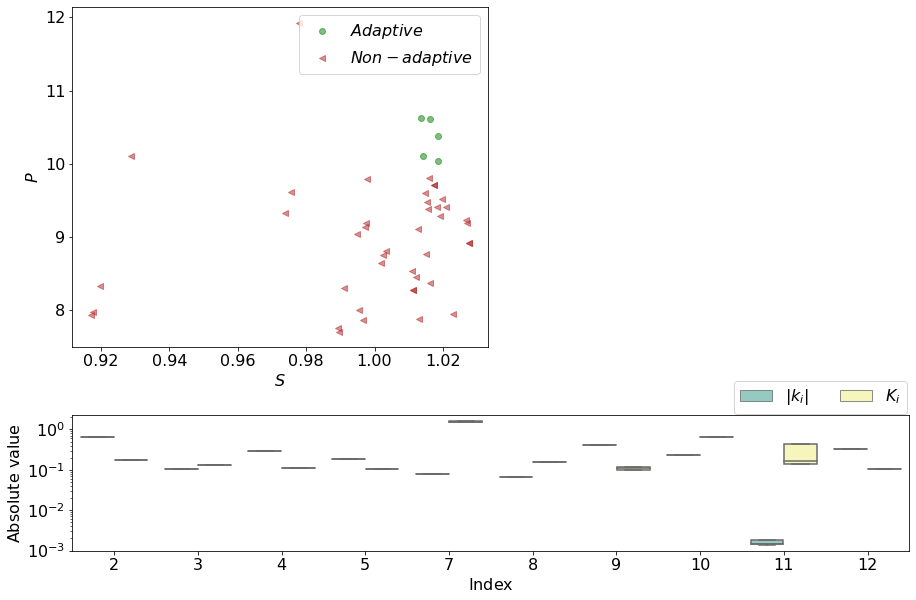

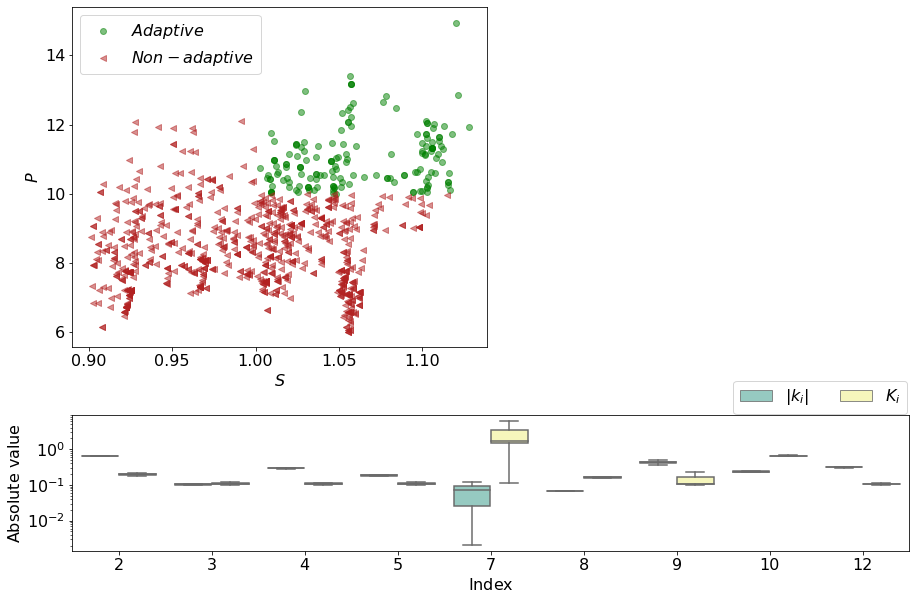

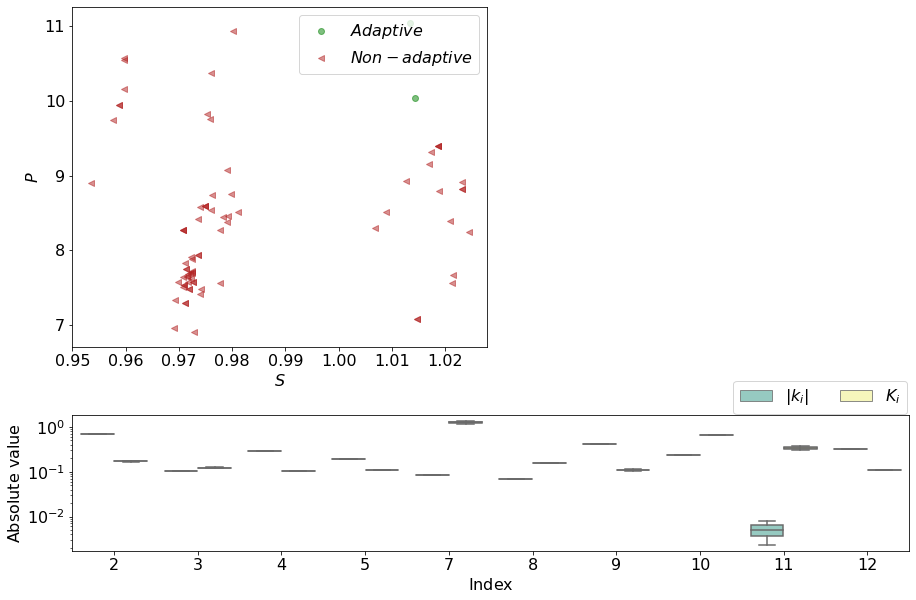

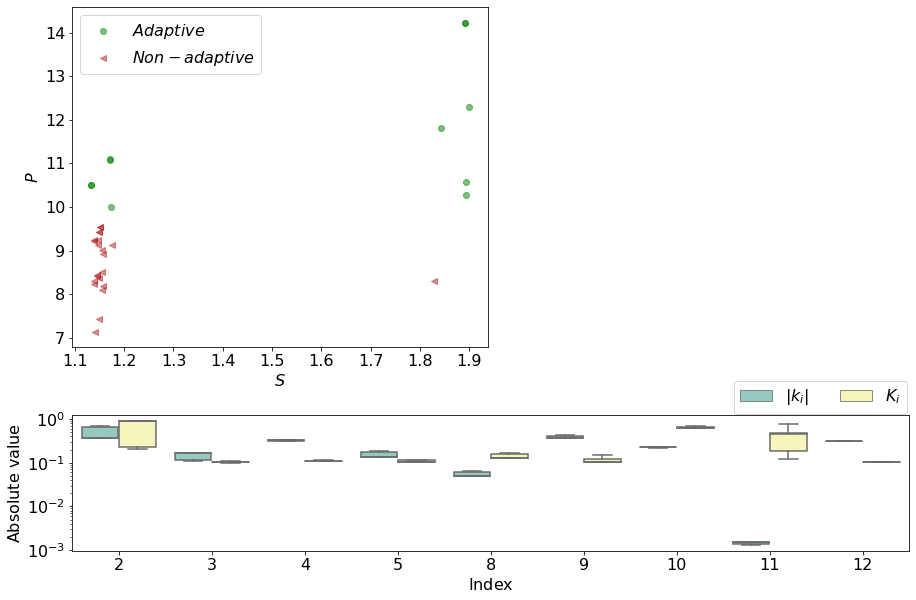

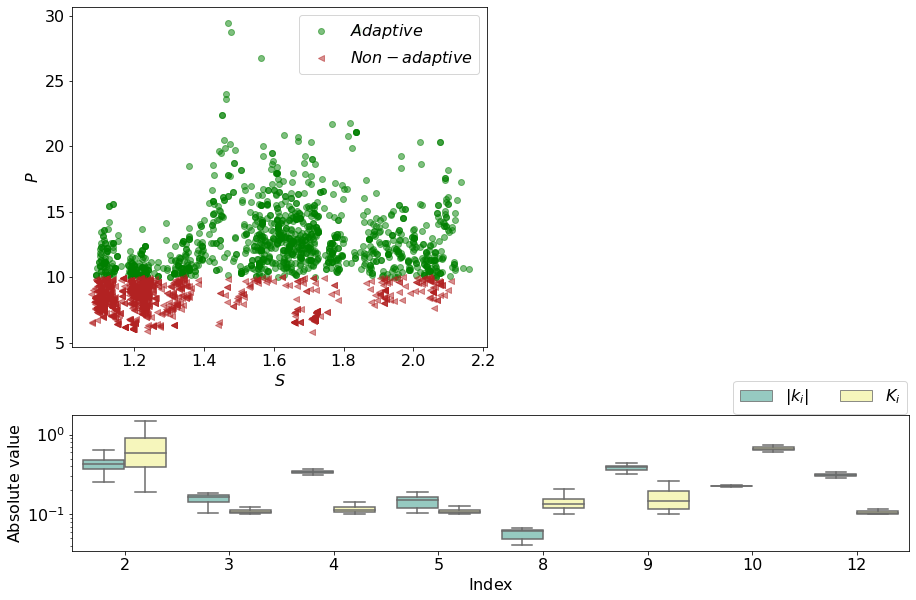

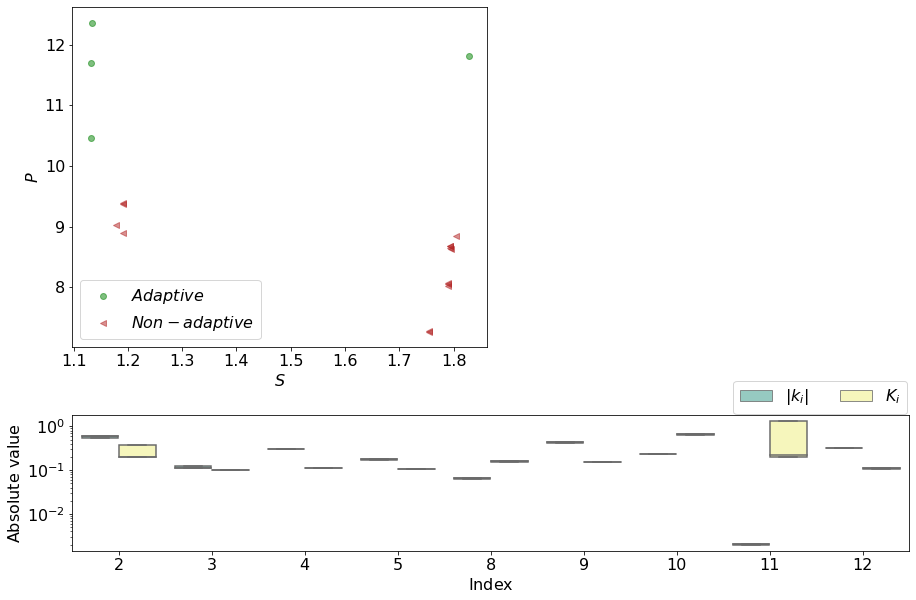

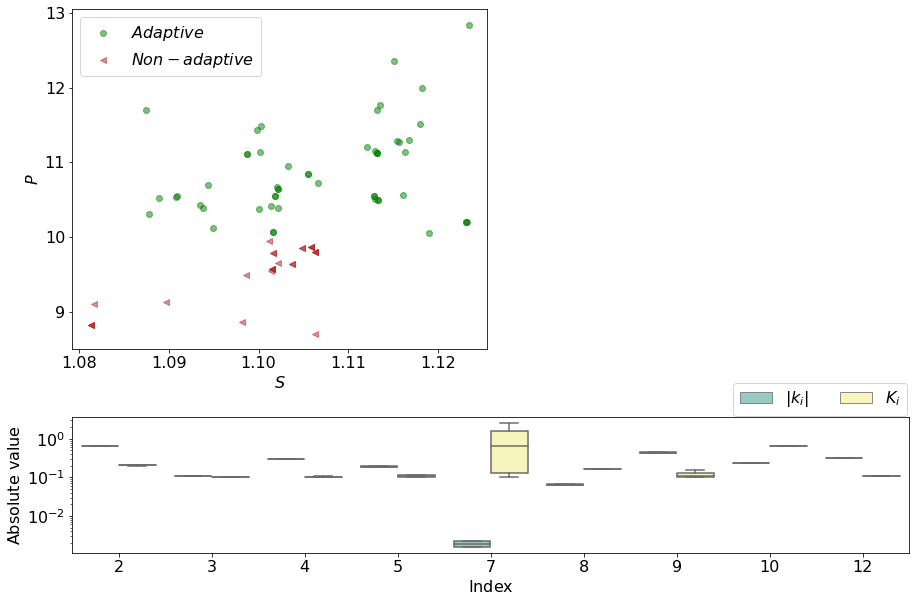

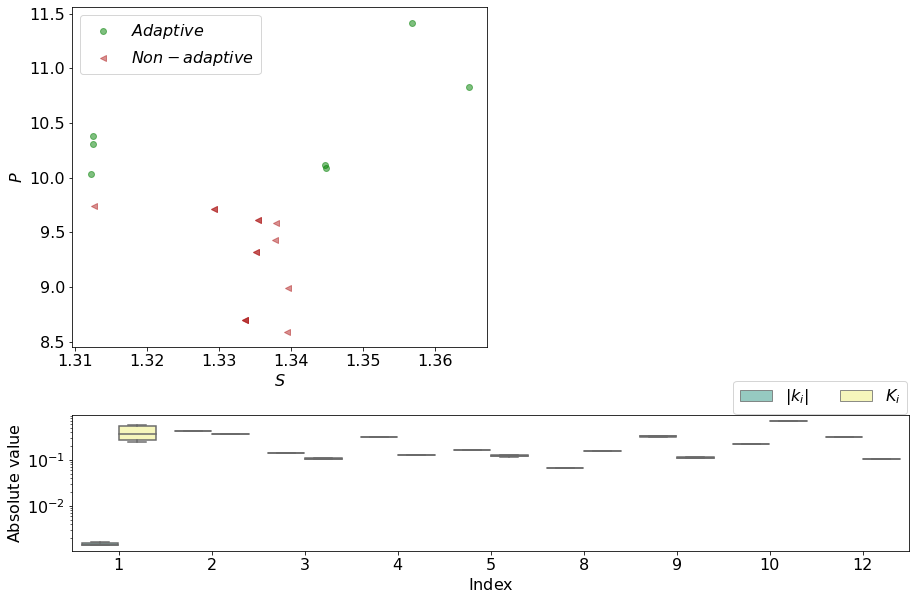

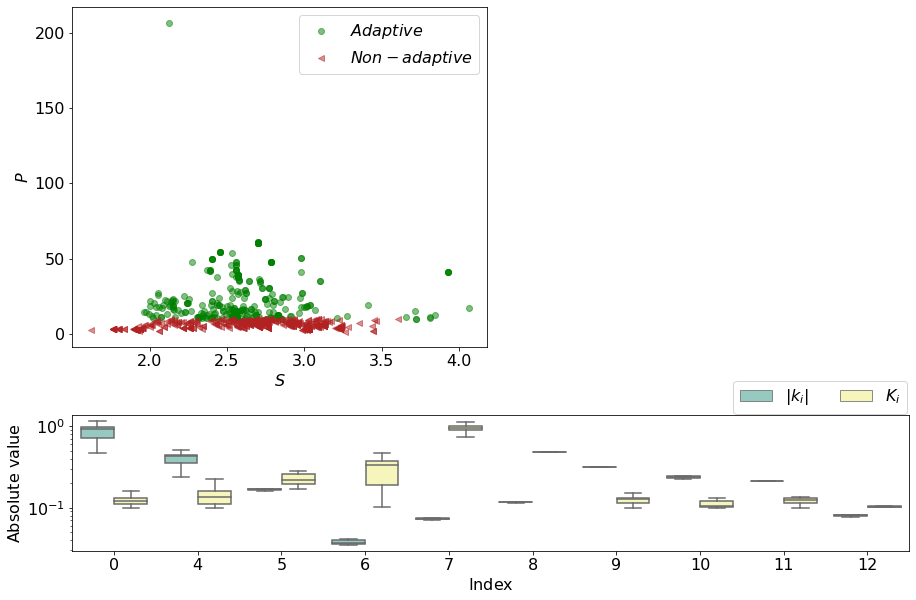

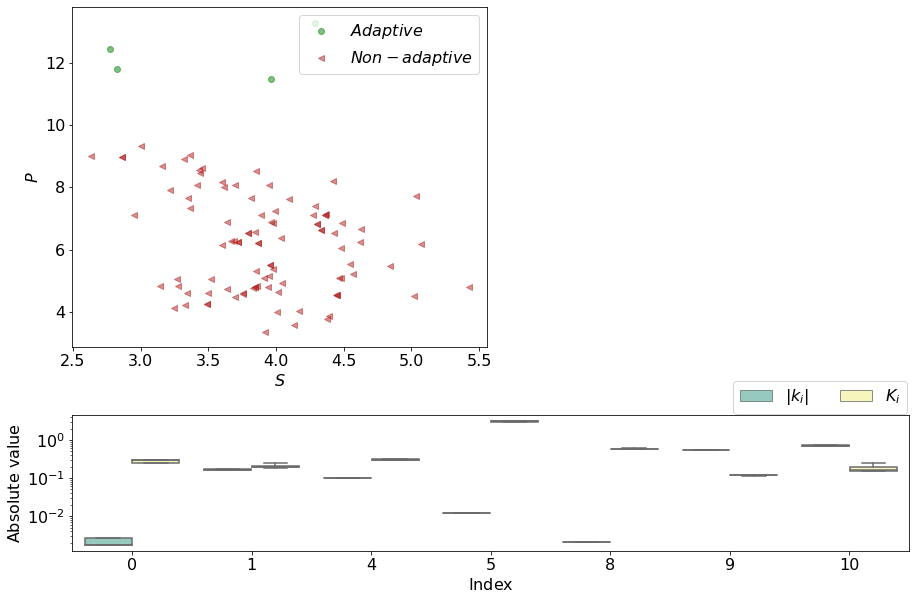

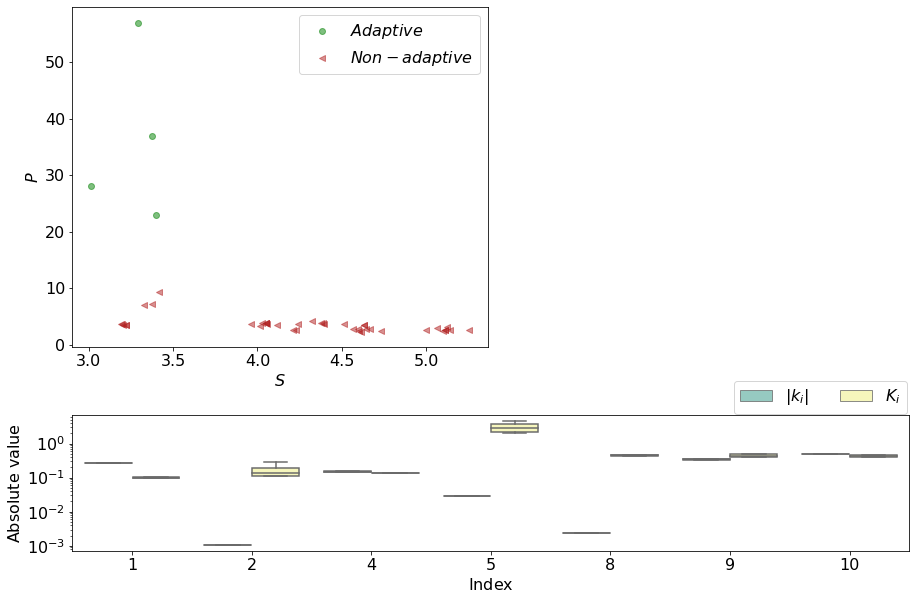

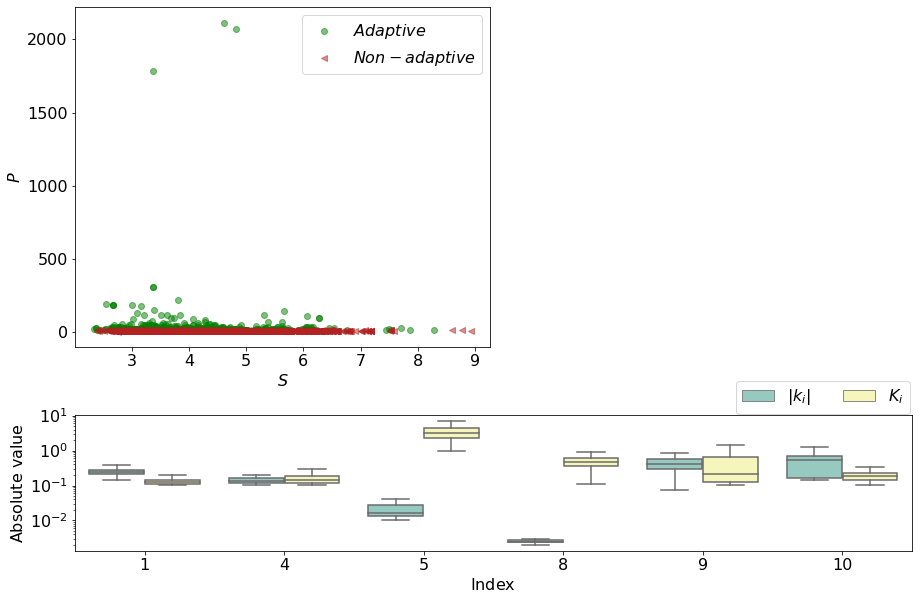

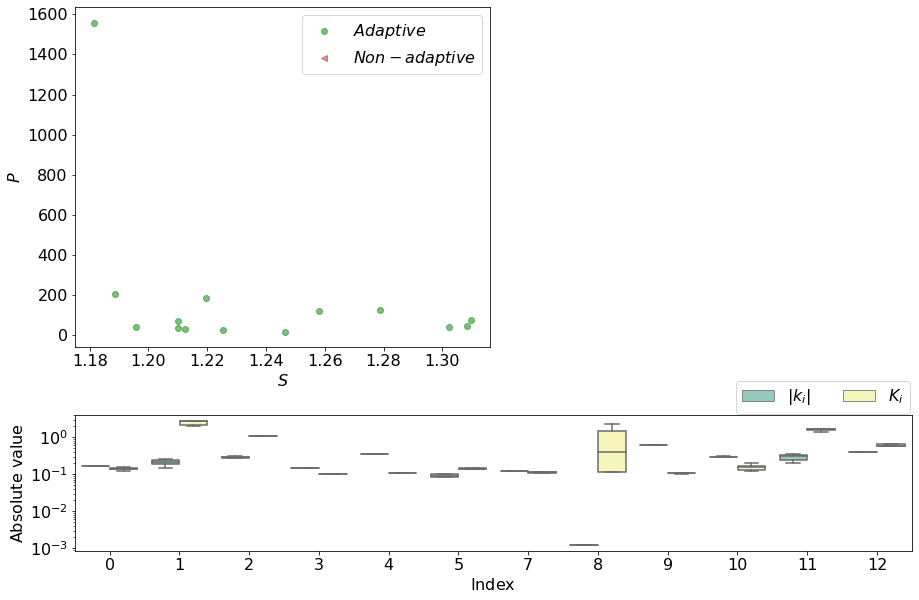

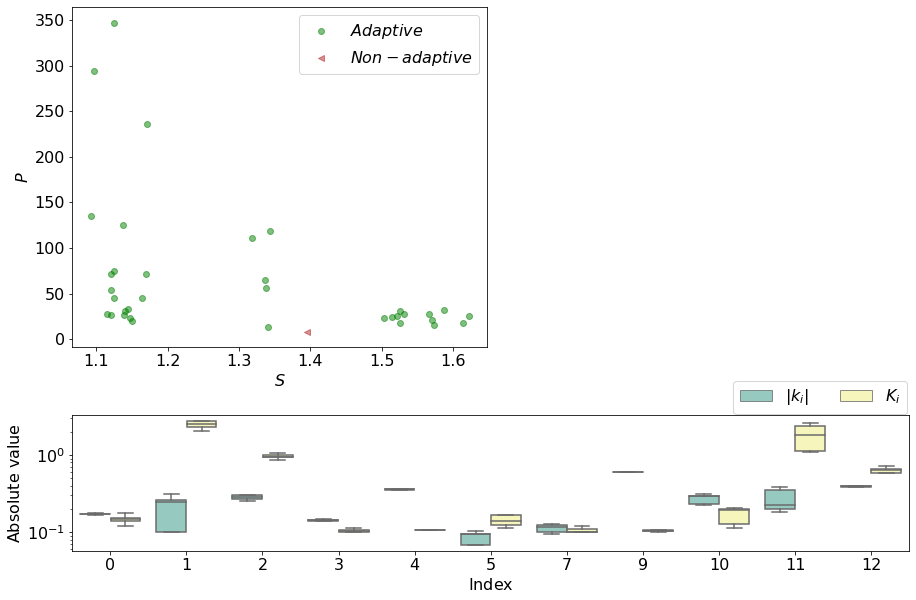

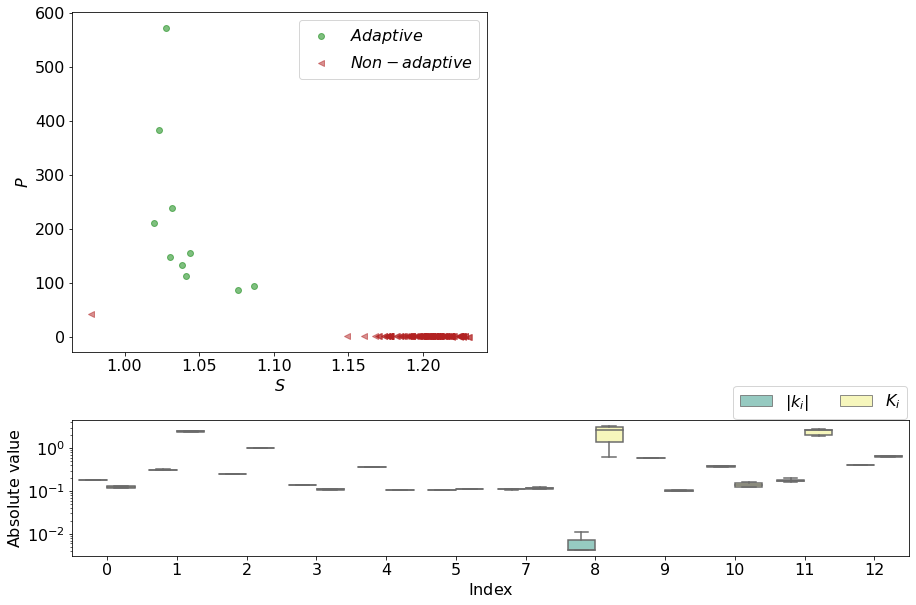

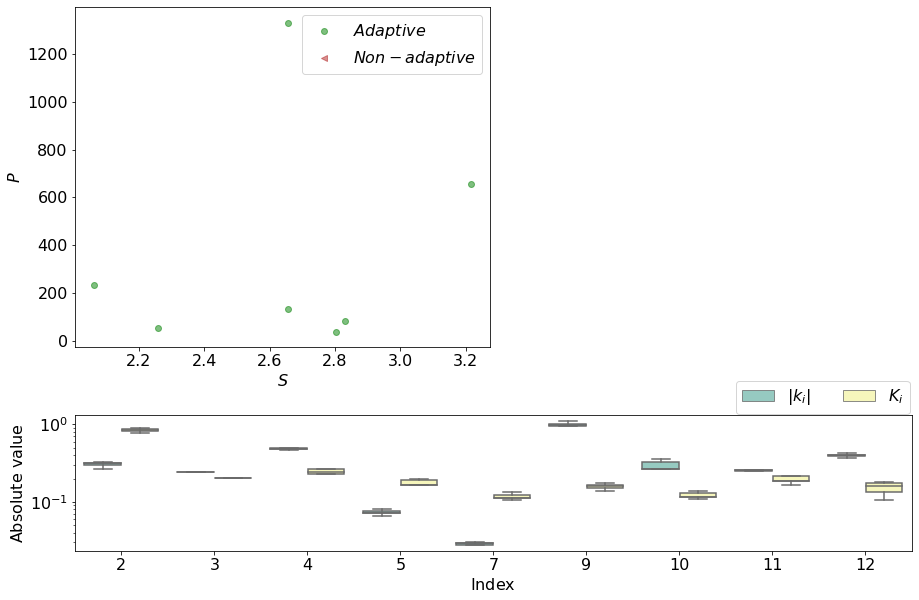

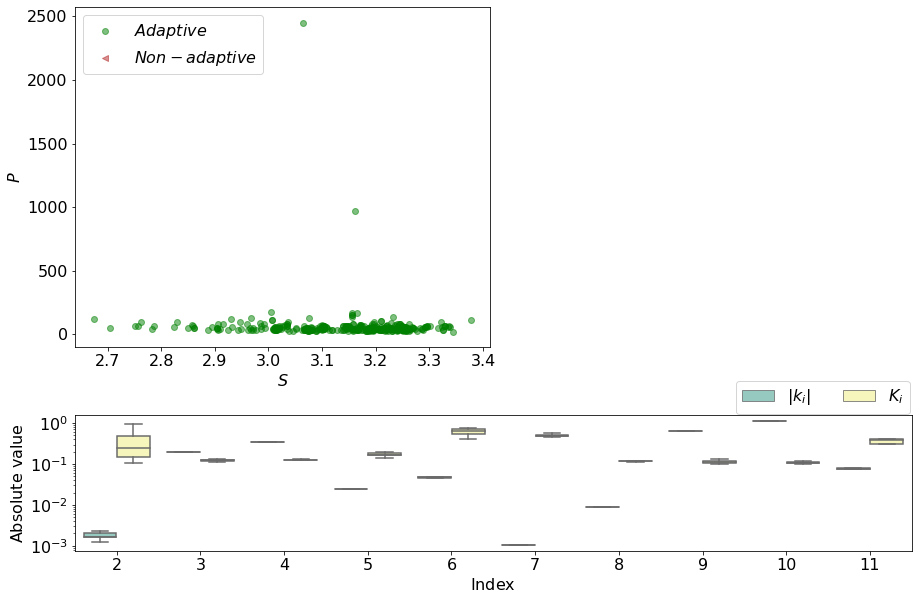

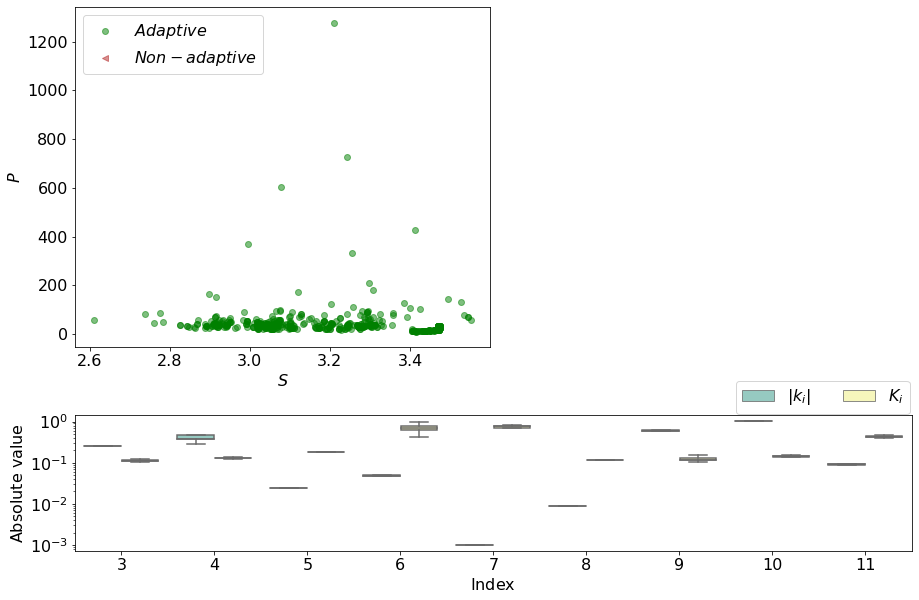

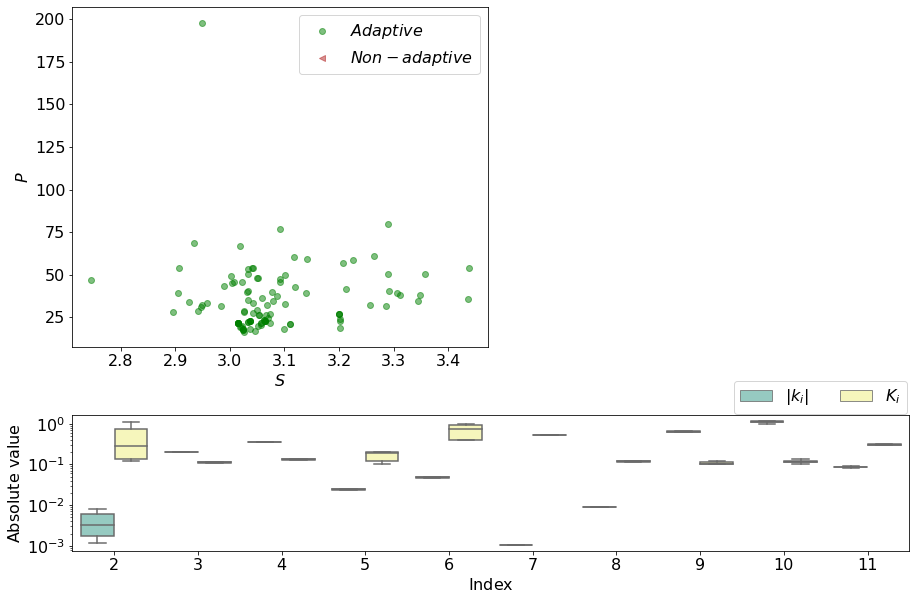

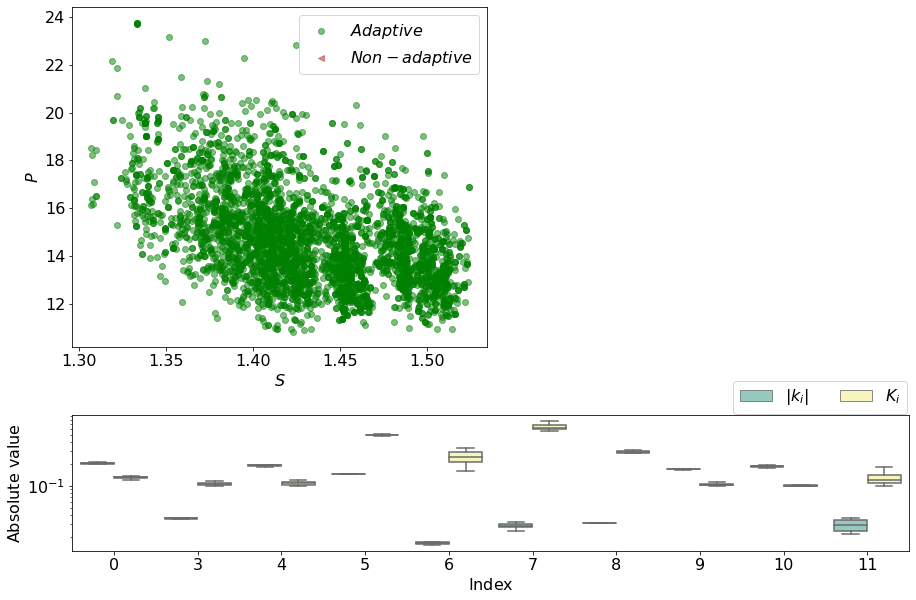

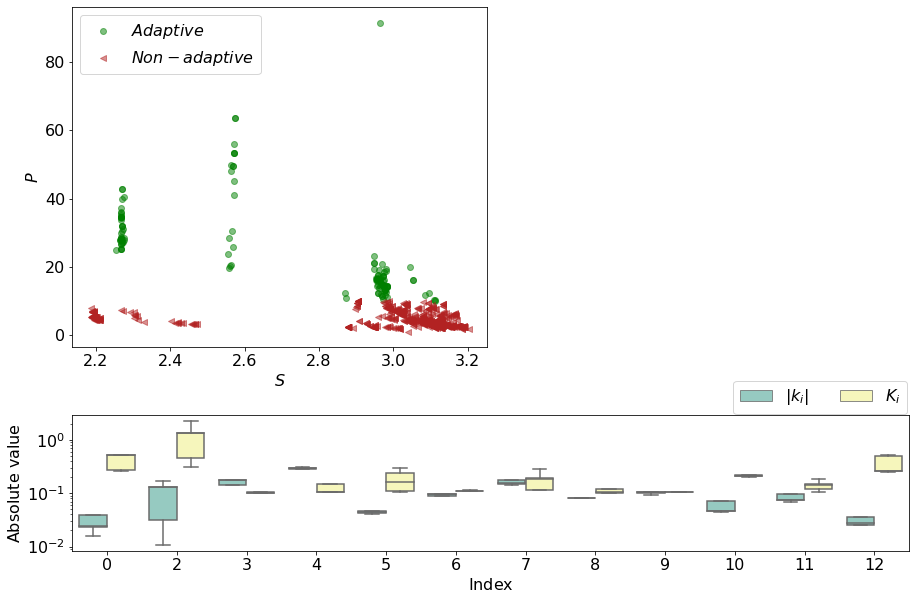

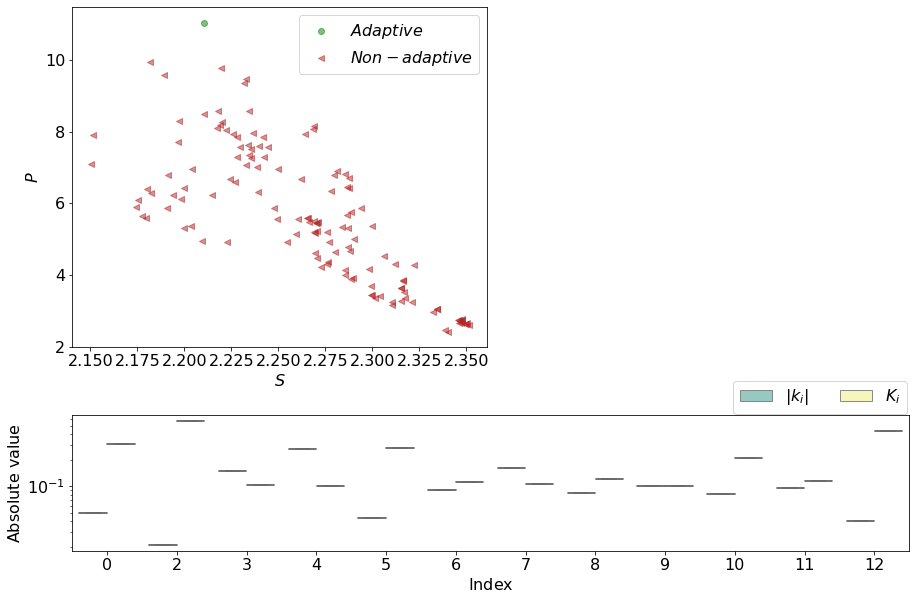

In [4]:
for j, fold in enumerate(DIR):    
    direc = fold[12:17]
    ext = fold[2:5]
    data = np.load(fold)
    theta = data[:,13:39]
    links = data[:,:13]
    name = np.asarray(LI[j,:])
    name = np.where(name==1,"p",name)
    name = np.where(name=='-1',"m",name)
    name = np.where(name=='-1.0',"m",name)
    name = np.where(name=='0',"o",name)
    name = np.where(name=='0.0',"o",name)
    name = ''.join(name) 
    
    P = data[:,40]
    S = data[:,39]
    print(fold,LI[j,:])
    mask = np.where((np.array(links) == tuple(LI[j,:])).all(axis=1))
    P = P[mask]
    S = S[mask]

    k = theta[mask,:13][0]
    mask2 = np.sum(k[:,:],axis=0) != 0
    
    xi = np.asarray([0,1,2,3,4,5,6,7,8,9,10,11,12])[mask2]

    k = k[:,mask2]
    K = theta[mask,13:26][0]
    K = K[:,mask2]
    maskSP = np.logical_and(P >10, S>1)
    k = k[maskSP,:]
    K = K[maskSP,:]
    df = {}
    lx = len(k)
    print(lx)
    num = []
    ks = []
    for i in xi:
        num.extend(lx*[i])
        ks.extend(lx*[r"$|k_i|$"])

    for i in xi:
        num.extend(lx*[i])
        ks.extend(lx*[r"$K_i$"])
    
    k = np.concatenate(np.transpose(k))
    K = np.concatenate(np.transpose(K))
    df = {"Values": np.append(abs(k),K),
         "Index": num,
         "Type": ks,}

    df = pd.DataFrame(df)  
    fsize = 16
    fig3 = plt.figure(figsize=(15,10))
    gs = fig3.add_gridspec(nrows=3, ncols=6, wspace=0.05, hspace=0.5)
    f3_ax1 = fig3.add_subplot(gs[:2, :3])
    plt.scatter(S[maskSP],P[maskSP],color="green",marker ="o" , alpha=0.5,label=r"$Adaptive$",)
    plt.scatter(S[~maskSP],P[~maskSP],color="firebrick",marker ="<" , alpha=0.5,label=r"$Non-adaptive$")
    plt.legend(fontsize=fsize)
    #plt.yscale("log")
    plt.xticks(size=fsize)
    plt.yticks(size=fsize)
    plt.xlabel(r"$S$",fontsize=fsize)
    plt.ylabel(r"$P$",fontsize=fsize)
    f3_ax2 = fig3.add_subplot(gs[2, :])
    ax = sns.boxplot(x="Index", y="Values", hue="Type", data=df, palette="Set3", showfliers = False)
    #plt.ylim([-1,2])
    plt.yscale("log")
    plt.xlabel(r"$\mathrm{Index}$",fontsize=fsize)
    plt.ylabel(r"$\mathrm{Absolute\,\, value}$",fontsize=fsize)
    plt.xticks(size=fsize)
    plt.yticks(size=fsize)
    plt.legend(bbox_to_anchor=(0.79, 1.25), ncol =7,  loc=2, borderaxespad=0.,fontsize=fsize)
    plt.savefig(direc+"_"+ext+"_"+name+"_summary_l.pdf",bbox_inches='tight')
    plt.savefig(direc+"_"+ext+"_"+name+"_summary_l.jpeg",bbox_inches='tight')
    